In [473]:
import numpy as np
import matplotlib.pyplot as plt

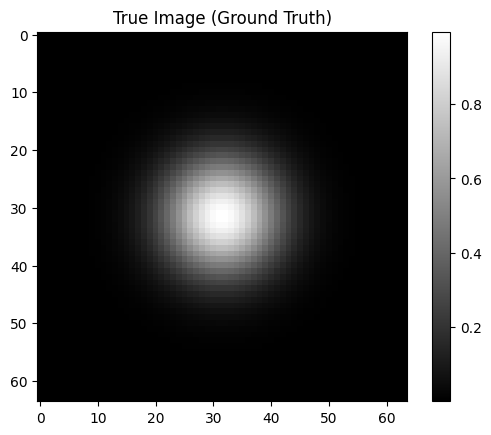

In [474]:
# Create a synthetic "true image" - A circle in a 64x64 grid
def generate_true_image(size=64):
    x, y = np.meshgrid(np.linspace(-1, 1, size), np.linspace(-1, 1, size))
    true_image = np.exp(-10 * (x**2 + y**2))  # Creates a Gaussian-like blob
    return true_image

# Generate and visualize the true image
true_image = generate_true_image()

plt.imshow(true_image, cmap='gray')
plt.title("True Image (Ground Truth)")
plt.colorbar()
plt.show()

In [475]:
# Step 2: Define MCMC functions (log-likelihood, log-prior, proposal function)

sigma = 0.1 # Noise level
prior_sigma = 1.0  # Prior strength

def log_likelihood(image):
    """Assume Gaussian likelihood centered around the true image."""
    return -np.sum((image - true_image) ** 2) / (2 * sigma**2)

def log_prior(image):
    """Assume Gaussian prior favoring smaller pixel values."""
    return -np.sum(image**2) / (2 * prior_sigma**2)

def proposal_func(image):
    """Generate a new image by adding small Gaussian noise."""
    return image + np.random.normal(0, 0.002, size=image.shape)

In [476]:
# Step 3: Implement Metropolis-Hastings MCMC sampling
def metropolis_hastings_sampling(image, log_likelihood, log_prior, proposal_func, num_samples=1000, burn_in=200):
    current_image = np.copy(image)
    current_log_posterior = log_likelihood(current_image) + log_prior(current_image)
    
    samples = []
    acceptance_rates = []
    accepted = 0

    for i in range(num_samples + burn_in):
        proposed_image = proposal_func(current_image)
        proposed_log_posterior = log_likelihood(proposed_image) + log_prior(proposed_image)

        acceptance_prob = min(1, np.exp(proposed_log_posterior - current_log_posterior))

        if np.random.rand() < acceptance_prob:
            current_image = proposed_image
            current_log_posterior = proposed_log_posterior
            accepted += 1
        
        if i >= burn_in:
            samples.append(np.copy(current_image))

        acceptance_rates.append(accepted / (i + 1))  # Track acceptance rate

    return samples, acceptance_rates

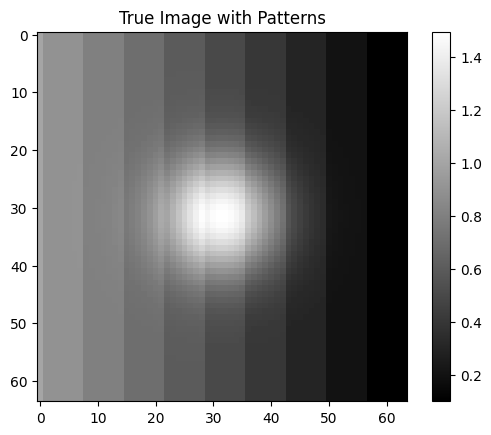

In [477]:
# Step 4: Initialize with noisy version of true image
def generate_scale_bar(size=64, num_levels=10):
    """
    Generate a gradient layer with high values at the top and low values at the bottom.
    The gradient is discretized into a specified number of levels to create visible steps.
    """
    # Create a linear gradient from high to low
    scale_layer = np.linspace(1, 0, size)  # Linear gradient from 1 to 0
    scale_layer = np.tile(scale_layer, (size, 1))  # Repeat to create 2D layer
    # Discretize the gradient into `num_levels` discrete steps
    scale_layer_discrete = np.digitize(scale_layer, bins=np.linspace(0, 1, num_levels))  # Bin values into levels
    # Normalize back to a range [0, 1] (if needed for visual consistency)
    scale_layer_discrete = scale_layer_discrete / num_levels
    
    return scale_layer_discrete

# Example usage: Add sinusoidal noise to the true image
initial_image = true_image + generate_scale_bar()

# Visualize the noisy image
plt.imshow(initial_image, cmap="gray")
plt.title("True Image with Patterns")
plt.colorbar()
plt.show()

In [478]:

num_samples = 20000  # Number of samples
burn_in = 2000  # Burn-in period

samples, acceptance_rates = metropolis_hastings_sampling(initial_image, log_likelihood, log_prior, proposal_func, num_samples, burn_in)

# Convert samples to numpy array
samples = np.array(samples)

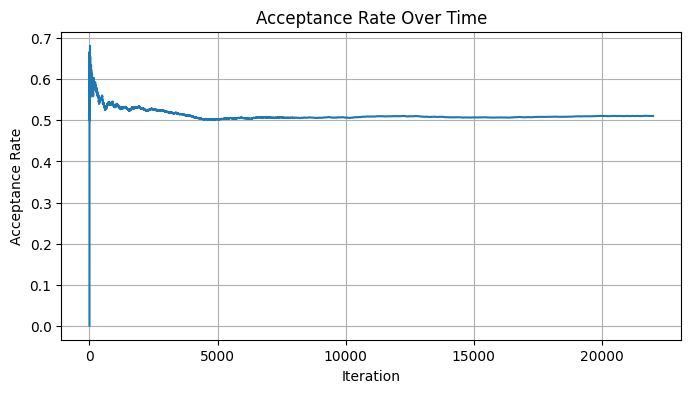

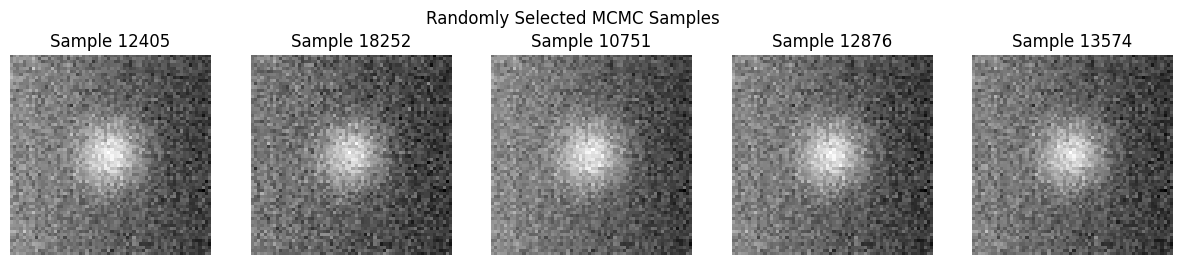

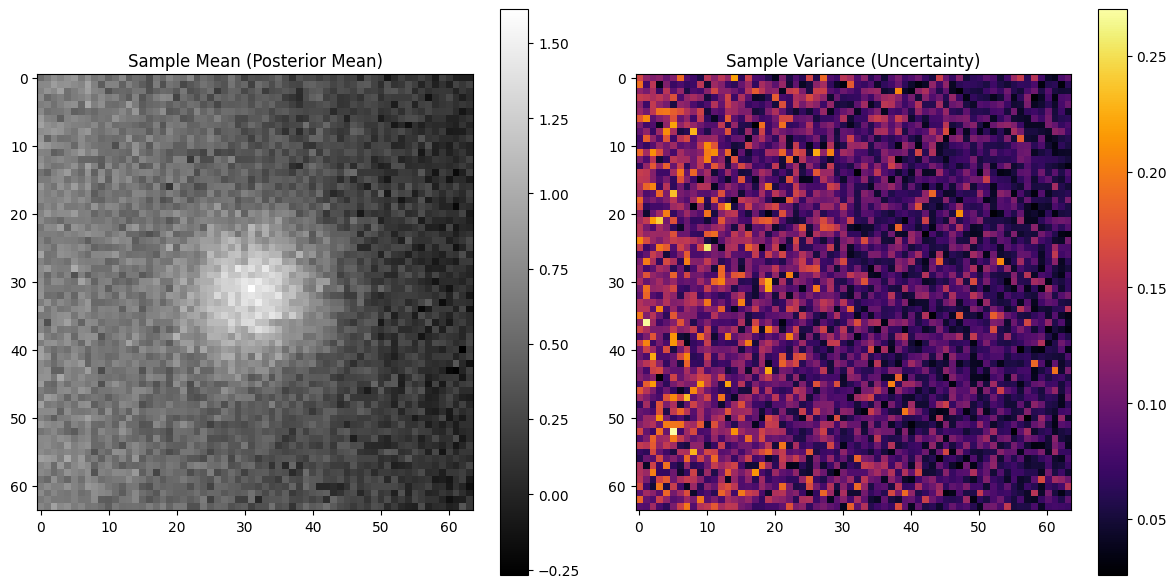

In [ ]:

# Step 6: Visualization

# Plot acceptance rate over iterations
plt.figure(figsize=(8, 4))
plt.plot(acceptance_rates)
plt.xlabel("Iteration")
plt.ylabel("Acceptance Rate")
plt.title("Acceptance Rate Over Time")
plt.grid()
plt.show()

# Select random samples to visualize
num_visualize = 5
random_indices = np.random.choice(len(samples), num_visualize, replace=False)

plt.figure(figsize=(15, 3))
for i, idx in enumerate(random_indices):
    plt.subplot(1, num_visualize, i + 1)
    plt.imshow(samples[idx], cmap="gray")
    plt.axis("off")
    plt.title(f"Sample {idx}")
plt.suptitle("Randomly Selected MCMC Samples")
plt.show()

# Compute sample mean and variance
sample_mean = np.mean(samples, axis=0)
sample_std = np.std(samples, axis=0)


plt.figure(figsize=(12, 6))
# Plot sample mean
plt.subplot(1, 2, 1)  
plt.imshow(sample_mean, cmap="gray")
plt.colorbar()
plt.title("Sample Mean (Posterior Mean)")

# Plot sample variance
plt.subplot(1, 2, 2) 
plt.imshow(sample_std, cmap="inferno")
plt.colorbar()
plt.title("Sample Variance (Uncertainty)")

# Show both plots
plt.tight_layout()
plt.show()